In [2]:
import numpy as np
import sys
sys.path.insert(1,'C:/Users/UASAL-OPTICS/Desktop/poke/') # One day I'll actually package poke!
import poke.poke_core as pol
from astropy.io import fits
import astropy.units as u
from hcipy import *
import matplotlib.pyplot as plt

In [3]:
# Let's try to make an HCIPy ELT Pupil
from hcipy.aperture.realistic import make_elt_aperture
pupil_grid = make_pupil_grid(256)
ap = make_elt_aperture(normalized=True)
pupil = ap(pupil_grid)

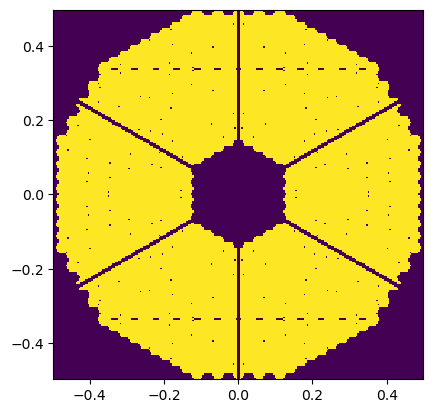

In [4]:
imshow_field(pupil)

In [5]:
import matplotlib.pyplot as plt
from astropy.io import fits


file_to_write = fits.HDUList(fits.PrimaryHDU(pupil.real.reshape([256,256])))
file_to_write.writeto('ELT_Pupil_256.fits',overwrite=True)

In [6]:
# Try load and plot
elt_pupil = fits.open('ELT_Pupil_256.fits')[0].data

In [17]:
# Awesome, now load a Jones pupil with 256 pixels
J_amp = fits.open('ELT_JonesPupil_0.364_amplitude.fits')[0].data 
J_phs = fits.open('ELT_JonesPupil_0.364_phase.fits')[0].data 

J = J_amp*np.exp(1j*J_phs)

C:\Users\UASAL-OPTICS\AppData\Local\Temp\ipykernel_34812\1006001819.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(J_amp[:,:,0,0]*elt_pupil/elt_pupil)
C:\Users\UASAL-OPTICS\AppData\Local\Temp\ipykernel_34812\1006001819.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(J_amp[:,:,0,1]*elt_pupil/elt_pupil)
C:\Users\UASAL-OPTICS\AppData\Local\Temp\ipykernel_34812\1006001819.py:12: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(J_amp[:,:,1,0]*elt_pupil/elt_pupil)
C:\Users\UASAL-OPTICS\AppData\Local\Temp\ipykernel_34812\1006001819.py:16: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(J_amp[:,:,1,1]*elt_pupil/elt_pupil)


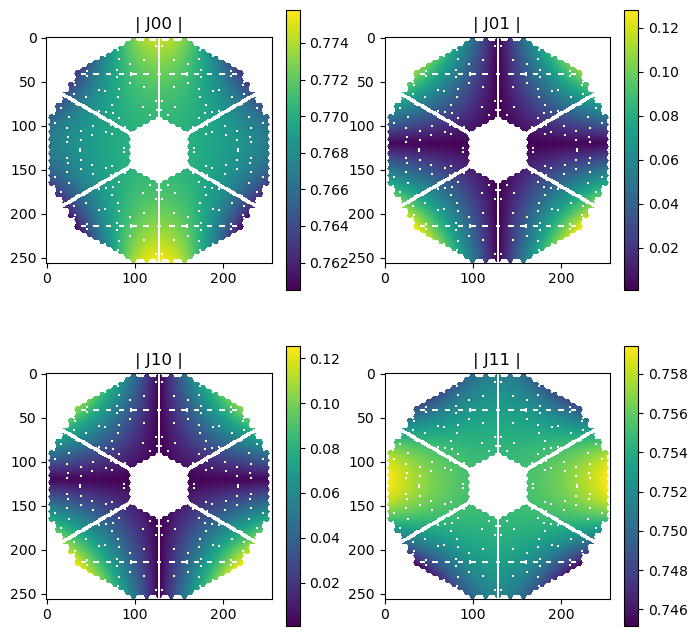

In [26]:
plt.figure(figsize=[8,8])
plt.subplot(221)
plt.title('| J00 |')
plt.imshow(J_amp[:,:,0,0]*elt_pupil/elt_pupil)
plt.colorbar()
plt.subplot(222)
plt.title('| J01 |')
plt.imshow(J_amp[:,:,0,1]*elt_pupil/elt_pupil)
plt.colorbar()
plt.subplot(223)
plt.title('| J10 |')
plt.imshow(J_amp[:,:,1,0]*elt_pupil/elt_pupil)
plt.colorbar()
plt.subplot(224)
plt.title('| J11 |')
plt.imshow(J_amp[:,:,1,1]*elt_pupil/elt_pupil)
plt.colorbar()

In [58]:
# Zernike Decomposition of the raw data with POPPY
import poppy
import astropy.units as u
wf = poppy.FresnelWavefront(beam_radius=1*u.m,oversample=1,npix=256)
optic = poppy.CircularAperture(radius=1*u.m)
mask = optic.get_transmission(wf)
coeffs = poppy.zernike.opd_expand(J_amp[:,:,0,0]*mask,nterms=200)


Oversampling > 2x suggested for reliable results in Fresnel propagation.


C:\Users\UASAL-OPTICS\AppData\Local\Temp\ipykernel_34812\829320682.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(masked_J*mask/mask)


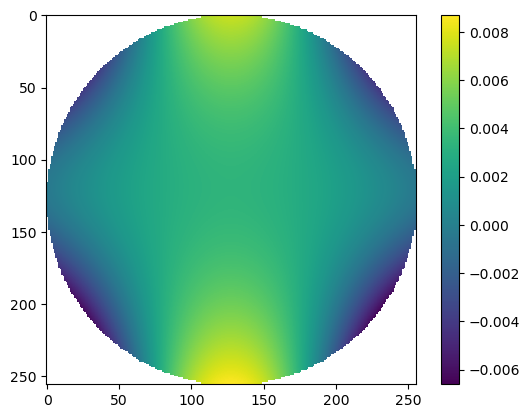

In [57]:
masked_J = J_amp[:,:,0,0]
masked_J -= np.mean(masked_J)
plt.imshow(masked_J*mask/mask)
plt.colorbar()

In [60]:
# The zernike decomposition doesn't work so well here, let's try just write the AOI directly

nan